In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nx = 512
Ny = 512
Lx = 2.0*np.pi
Ly = 2.0*np.pi

g = 2000.0
dt = 1.e-3

file_start = 100
file_end = 200


In [3]:
def define_k():
	kx = np.zeros((Nx,Ny),dtype=np.complex128)
	ky = np.zeros((Nx,Ny),dtype=np.complex128)

	for i in range(Nx//2):
		for j in range(Ny//2):
			kx[i,j] = 1j* 2.0 * np.pi * i / Lx
			kx[Nx-i-1,j] = 1j* 2.0 * np.pi * (-i-1) / Lx
			kx[i,Ny-j-1] = 1j* 2.0 * np.pi * i / Lx
			kx[Nx-i-1,Ny-j-1] = 1j* 2.0 * np.pi * (-i-1) / Lx

			ky[i,j] = 1j* 2.0 * np.pi * j / Ly
			ky[Nx-i-1,j] = 1j* 2.0 * np.pi * j / Ly
			ky[i,Ny-j-1] = 1j* 2.0 * np.pi * (-j-1) / Ly
			ky[Nx-i-1,Ny-j-1] = 1j* 2.0 * np.pi * (-j-1) / Ly
	
	return kx,ky

In [4]:
def compute_velocity(psi):

	psi_hat = np.fft.fft2(psi)
	kx, ky = define_k()

	phase = np.angle(psi)
	conj_psi_norm = np.cos(-phase) + 1j*np.sin(-phase)
	u = np.imag(np.fft.ifft2(kx*psi_hat)*conj_psi_norm) # this is \sqrt{\rho} * v
	v = np.imag(np.fft.ifft2(ky*psi_hat)*conj_psi_norm)
	
	return u,v

In [5]:
def helmholtz_decomposition(u,v):
    kx, ky = define_k()
    k2 = (kx**2 + ky**2)
    k2[0,0] = 1
    phi_comp = ( kx * np.fft.fft2(u) + ky * np.fft.fft2(v)) / k2
    phi_comp[0,0] = 0

    u_comp = np.real(np.fft.ifft2( kx * phi_comp))
    v_comp = np.real(np.fft.ifft2( ky * phi_comp))
 
    u_inc = u - u_comp
    v_inc = v - v_comp
    return u_comp, v_comp, u_inc, v_inc


In [6]:
def compute_vorticity(psi):

    psi_hat = np.fft.fft2(psi)
    kx, ky = define_k()

    phase = np.angle(psi)
    conj_psi_norm = np.cos(-phase) + 1j*np.sin(-phase)
   
    u = np.imag(np.fft.ifft2(kx*psi_hat)*conj_psi_norm)
    v = np.imag(np.fft.ifft2(ky*psi_hat)*conj_psi_norm)
    w = np.real(np.fft.ifft2( kx * np.fft.fft2(v) - ky * np.fft.fft2(u) ))
    return w

In [7]:
def compute_momentum(psi):
    u,v = compute_velocity(psi)
    u_comp, v_comp, u_inc, v_inc = helmholtz_decomposition(u,v)
    dx = Lx/Nx
    dy = Ly/Ny
    momx = dx*dy*np.sum(np.sum(u))
    momy = dx*dy*np.sum(np.sum(v))
    momx_comp = dx*dy*np.sum(np.sum(u_comp))
    momy_comp = dx*dy*np.sum(np.sum(v_comp))
    momx_inc = dx*dy*np.sum(np.sum(u_inc))
    momy_inc = dx*dy*np.sum(np.sum(v_inc))
    
    return momx, momx_comp, momx_inc, momy, momy_comp, momy_inc

In [8]:
def vortex_tracking(psi):
    w = compute_vorticity(psi)
    x_pos, y_pos = np.unravel_index(np.argmax(w,axis=None), w.shape)
    x_neg, y_neg = np.unravel_index(np.argmin(w,axis=None), w.shape)

    dx = Lx/Nx
    dy = Ly/Ny

    rx = x_pos - x_neg 
    ry = y_pos - y_neg 
    if rx <= -Nx/2:
        rx = rx + Nx
    elif rx > Nx/2:
        rx = rx - Nx

    if ry <= -Ny/2:
        ry = ry + Ny
    elif ry > Ny/2:
        ry = ry - Ny

    return np.sqrt( (dx*rx)**2  + (dy*ry)**2)

    




In [9]:
def compute_energy(psi):

    dx = Lx/Nx
    dy = Ly/Ny
    energy_int = 0.25 * dx * dy * g * np.sum(np.sum((np.abs(psi)**2 -1.0 )**2.0))
    u,v = compute_velocity(psi)
    u_comp, v_comp, u_inc, v_inc = helmholtz_decomposition(u,v)
    energy_kinetic_inc = 0.5 * dx * dy * np.sum(np.sum(u_inc**2 + v_inc**2) ) 
    energy_kinetic_comp = 0.5 * dx * dy * np.sum(np.sum(u_comp**2 + v_comp**2)  )

    psi_hat = np.fft.fft2(psi)
    kx, ky = define_k()

    phase = np.angle(psi)
    conj_psi_norm = np.cos(-phase) + 1j*np.sin(-phase)
   
    rho_x = np.real(np.fft.ifft2(kx*psi_hat)*conj_psi_norm)
    rho_y = np.real(np.fft.ifft2(ky*psi_hat)*conj_psi_norm)


    energy_quantum = dx * dy * np.sum( np.sum(rho_x**2 + rho_y**2)  )

    energy_total = energy_kinetic_inc + energy_kinetic_comp + energy_quantum + energy_int
    return energy_kinetic_inc, energy_kinetic_comp, energy_quantum, energy_int, energy_total


loading file 1
loading file 2
loading file 3
loading file 4
loading file 5
loading file 6
loading file 7
loading file 8
loading file 9
loading file 10
loading file 11
loading file 12
loading file 13
loading file 14
loading file 15
loading file 16
loading file 17
loading file 18
loading file 19
loading file 20
loading file 21
loading file 22
loading file 23
loading file 24
loading file 25
loading file 26
loading file 27
loading file 28
loading file 29
loading file 30
loading file 31
loading file 32
loading file 33
loading file 34
loading file 35
loading file 36
loading file 37
loading file 38
loading file 39
loading file 40
loading file 41
loading file 42
loading file 43
loading file 44
loading file 45
loading file 46
loading file 47
loading file 48
loading file 49
loading file 50
loading file 51
loading file 52
loading file 53
loading file 54
loading file 55
loading file 56
loading file 57
loading file 58
loading file 59
loading file 60
loading file 61
loading file 62
loading file 63
l

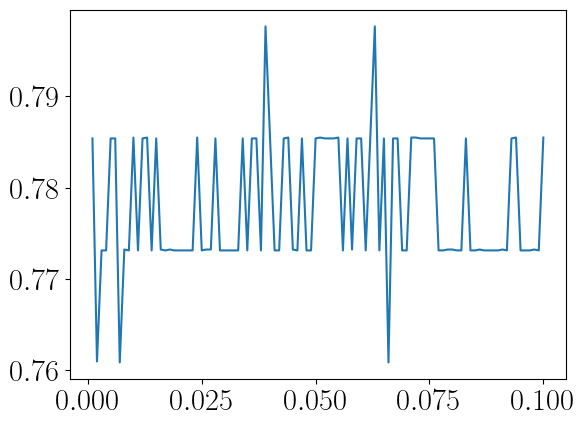

In [12]:
time = []; 
dipoleDistance = [];
momTotalx = []; momTotaly = []; momIncx = []; momIncy = []; momCompx = []; momCompy = []; 



for file in range(file_start,file_end+1,1):
    
    print('loading file', file )
	#filename = '../../initial_state/psi.%.5d' % (file);
    filename = '/data/2d_gross_pitaevskii/dipole_tracking/N=512_w_sound_T=5em5_small_dt/data/psi.%.5d' % (file);
    data = np.loadtxt(filename)
    psi = data[:,2]+1j*data[:,3]
    psi = np.reshape(psi, (Nx,Ny))
    
    momx, momx_comp, momx_inc, momy, momy_comp, momy_inc = compute_momentum(psi)
    

    time.append(dt*file)
    dipoleDistance.append(vortex_tracking(psi))
    momTotalx.append(momx); momTotaly.append(momy); momIncx.append(momx_inc); momIncy.append(momy_inc); momCompx.append(momx_comp); momCompy.append(momy_comp);


    

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=22)
#plt.plot(time,dipoleDistance)
plt.plot(time,momIncx)
plt.plot(time,momCompx)
plt.plot(time,momIncy)
plt.plot(time,momCompy)
plt.plot(time,dipoleDistance)
plt.plot(time,dipoleDistance)



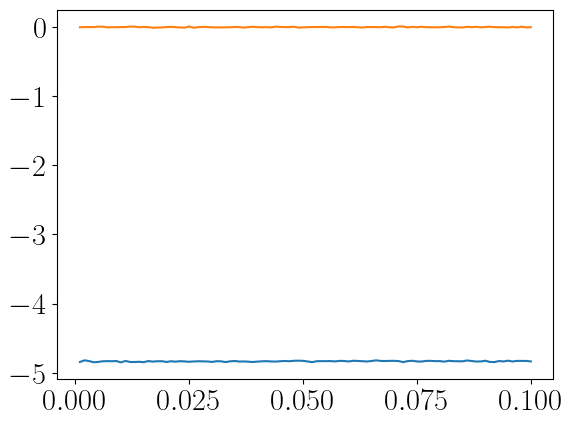

In [17]:
plt.plot(time,momIncx)
#plt.plot(time,momCompx)
plt.plot(time,momIncy)
#plt.plot(time,momCompy)

NameError: name 'w' is not defined

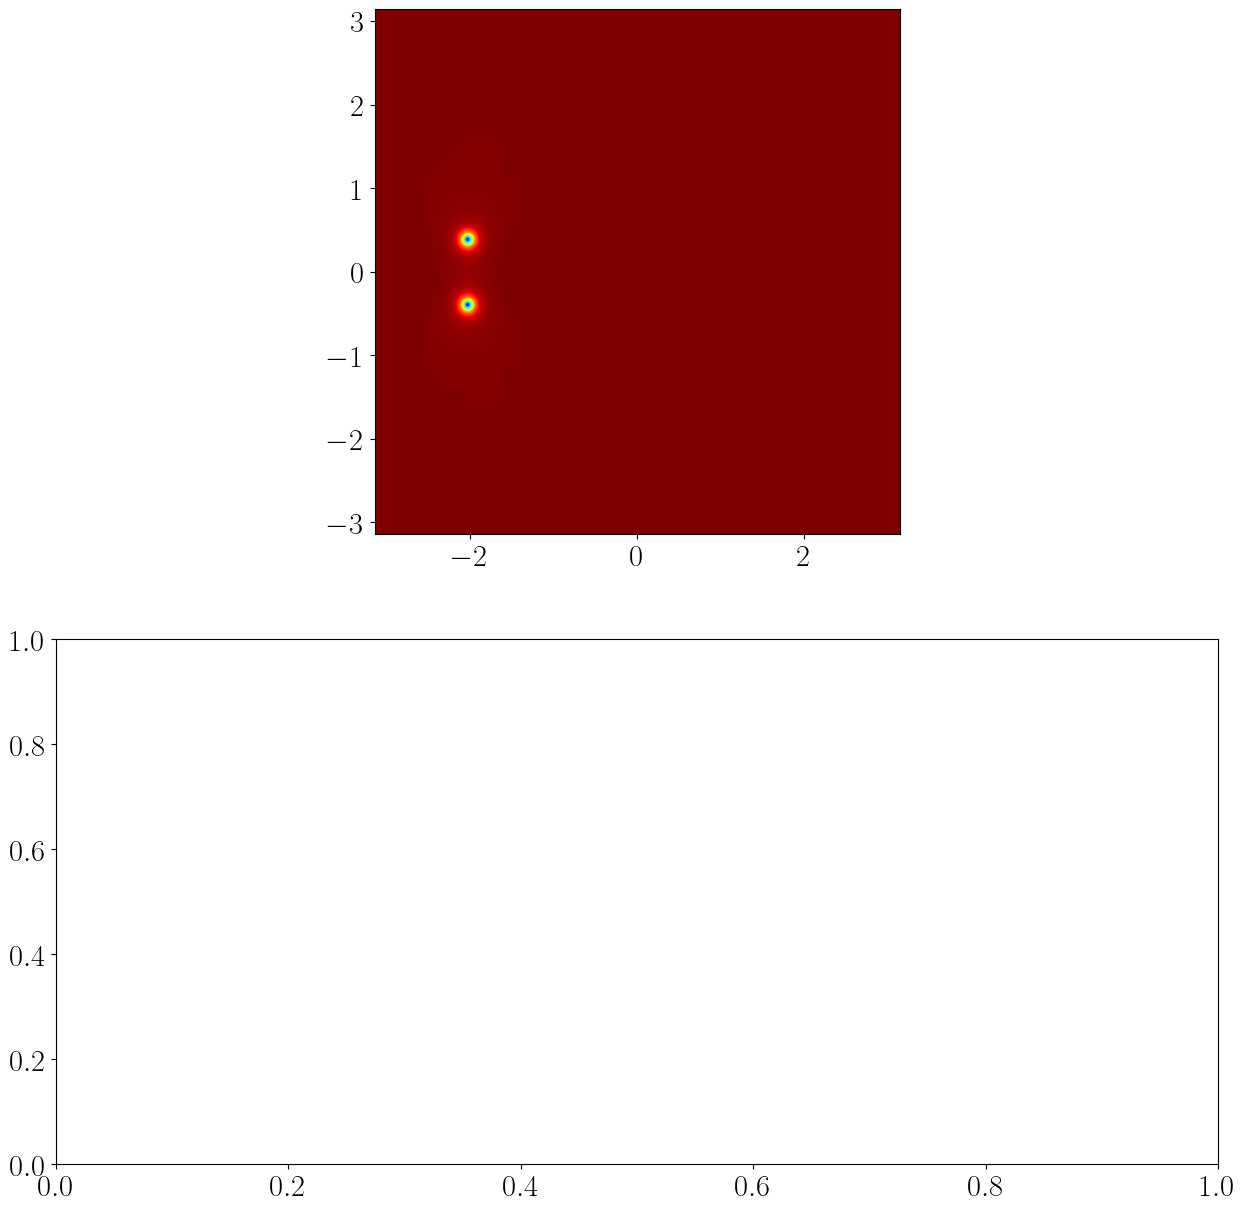

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=22)

fig1, axs1 = plt.subplots( 2,figsize=(15,15))

im1a = axs1[0].imshow(np.abs(psi.T), interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = abs(psi).max(), vmin = 0 )
im1b = axs1[1].imshow(w.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = abs(w).max(), vmin = -abs(w).max() )

fig1.colorbar(im1a, ax=axs1[0])
fig1.colorbar(im1b, ax=axs1[1])



fig2, axs2 = plt.subplots( 3,figsize=(15,15))

im2a = axs2[0].imshow(u.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(u).max(), vmin = -np.abs(u).max() )
im2b = axs2[1].imshow(u_comp.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(u_comp).max(), vmin = -np.abs(u_comp).max() )
im2c = axs2[2].imshow(u_inc.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(u_inc).max(), vmin = -np.abs(u_inc).max() )

fig2.colorbar(im2a, ax=axs2[0])
fig2.colorbar(im2b, ax=axs2[1])
fig2.colorbar(im2c, ax=axs2[2])

fig3, axs3 = plt.subplots( 3,figsize=(15,15))

im3a = axs3[0].imshow(v.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(v).max(), vmin = -np.abs(v).max() )
im3b = axs3[1].imshow(v_comp.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(v_comp).max(), vmin = -np.abs(v_comp).max() )

im3c = axs3[2].imshow(v_inc.T, interpolation='bilinear',cmap='jet', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2], vmax = np.abs(v_inc).max(), vmin = -np.abs(v_inc).max() )

fig3.colorbar(im3a, ax=axs3[0])
fig3.colorbar(im3b, ax=axs3[1])
fig3.colorbar(im3c, ax=axs3[2])

